In [14]:
import kagglehub
import os

path = kagglehub.dataset_download("crawford/emnist")
print("Dataset path:", path)

Using Colab cache for faster access to the 'emnist' dataset.
Dataset path: /kaggle/input/emnist


In [15]:
import os

dataset_path = "/kaggle/input/emnist"
os.listdir(dataset_path)

['emnist-letters-mapping.txt',
 'emnist-letters-test.csv',
 'emnist-mnist-mapping.txt',
 'emnist-digits-train.csv',
 'emnist-bymerge-mapping.txt',
 'emnist-balanced-train.csv',
 'emnist-digits-test.csv',
 'emnist-balanced-test.csv',
 'emnist-mnist-test.csv',
 'emnist-letters-train.csv',
 'emnist-byclass-train.csv',
 'emnist-bymerge-test.csv',
 'emnist-balanced-mapping.txt',
 'emnist-mnist-train.csv',
 'emnist-digits-mapping.txt',
 'emnist-bymerge-train.csv',
 'emnist-byclass-test.csv',
 'emnist_source_files',
 'emnist-byclass-mapping.txt']

In [16]:
import pandas as pd

dataset_path = "/kaggle/input/emnist"

train_data = pd.read_csv(f"{dataset_path}/emnist-letters-train.csv")
test_data  = pd.read_csv(f"{dataset_path}/emnist-letters-test.csv")

print(train_data.shape)
print(test_data.shape)
train_data.head()

(88799, 785)
(14799, 785)


,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
column_names = ['label'] + [f'pixel_{i}' for i in range(784)]
train_data.columns = column_names
test_data.columns=column_names

In [19]:
train_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#unique values in label columns
number_of_labels = train_data['label'].nunique()

In [21]:
train_data.shape

(88799, 785)

In [22]:
test_data.shape

(14799, 785)

In [23]:
test_data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize class balance

In [ ]:
class_counts = pd.Series(y_int).value_counts().sort_index()
class_counts.index = [chr(i + 65) for i in class_counts.index]
plt.figure(figsize=(14, 5))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class (A–Z)")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=0)
plt.show()


In [25]:
def show_samples(X, y, classes=26, n=8):
    plt.figure(figsize=(12,3))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(X[i].squeeze(), cmap='gray')
        lbl = np.argmax(y[i]) if y is not None else None
        if lbl is not None:
            plt.title(chr(ord('A') + lbl))
        plt.axis('off')
    plt.show()

In [26]:
# Separate features and labels of training
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values


print("Features shape:", X_train.shape)
print("Labels shape:", y_train.shape)


Features shape: (88799, 784)
Labels shape: (88799,)


In [27]:
# Separate features and labels of testing
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

print("Features shape:", X_test.shape)
print("Labels shape:", y_test.shape)

Features shape: (14799, 784)
Labels shape: (14799,)


In [28]:

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)


x_train shape:  (88799, 28, 28, 1)
x_test shape:  (14799, 28, 28, 1)


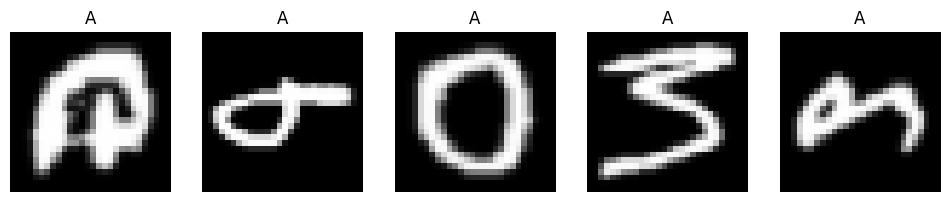

In [29]:
show_samples(X_train, y_train, n=5)

In [30]:
X_train = np.rot90(X_train, k=1, axes=(1,2))
X_test  = np.rot90(X_test,  k=1, axes=(1,2))

# Visualizing some samples after rotation

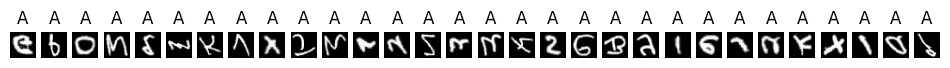

In [31]:
show_samples(X_train, y_train, n=30)

In [32]:
# Normlization
X_train = X_train.astype('float32') / 255.0
X_test  = X_test.astype('float32') / 255.0

# Shuffling the training dataset

In [33]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train & validation split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)

Training set: (79919, 28, 28, 1) (79919,)
Validation set: (8880, 28, 28, 1) (8880,)


#One Hot encoding

In [35]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train - 1, num_classes=26)
y_val   = to_categorical(y_val   - 1, num_classes=26)
y_test  = to_categorical(y_test  - 1, num_classes=26)


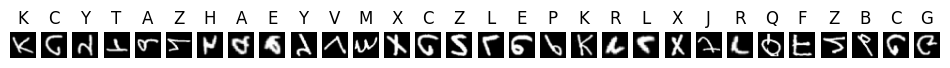

In [36]:
show_samples(X_train, y_train, n=30)

# Initialize the model

In [37]:
model_vgg = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# VGG 19

In [38]:
# # import tensorflow as tf
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# def build_vgg19_from_scratch(input_shape=(32, 32, 3), num_classes=26):
#     model_vgg = Sequential()

#     # Block 1
#     model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
#     model_vgg.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 2
#     model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 3
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 4
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Block 5
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#     model_vgg.add(MaxPooling2D((2, 2), strides=(2, 2)))

#     # Fully Connected Layers
#     model_vgg.add(Flatten())
#     model_vgg.add(Dense(4096, activation='relu'))
#     model_vgg.add(Dropout(0.5))
#     model_vgg.add(Dense(4096, activation='relu'))
#     model_vgg.add(Dropout(0.5))
#     model_vgg.add(Dense(num_classes, activation='softmax')) # For classification

#     return model_vgg

# model_vgg = build_vgg19_from_scratch()


# Compile the model

In [39]:
model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [40]:
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=6,
        restore_best_weights=True
    )
]


In [41]:
history = model_vgg.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.7727 - loss: 0.7731 - val_accuracy: 0.9220 - val_loss: 0.2336
Epoch 2/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9219 - loss: 0.2296 - val_accuracy: 0.9364 - val_loss: 0.1915
Epoch 3/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9348 - loss: 0.1894 - val_accuracy: 0.9349 - val_loss: 0.1893
Epoch 4/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9404 - loss: 0.1704 - val_accuracy: 0.9400 - val_loss: 0.1785
Epoch 5/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9455 - loss: 0.1524 - val_accuracy: 0.9409 - val_loss: 0.1892
Epoch 6/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9485 - loss: 0.1402 - val_accuracy: 0.9428 - val_loss: 0.1812
Epoch 7/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9518 - loss: 0.1296 - val_accuracy: 0.9416 - val_loss: 0.1825
Epoch 8/50
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9557 - loss: 0.1180

In [42]:
# save final model
model_vgg.save('final_emnist_vgg.h5')

# Training & Validation Loss & Accuracy

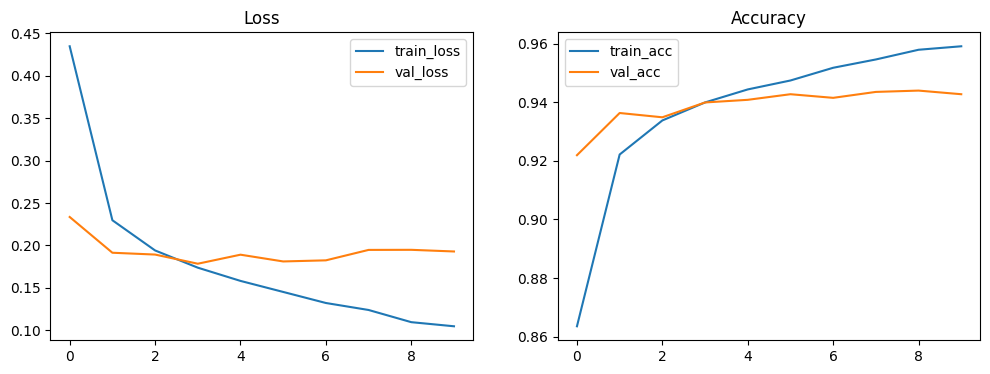

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# Final Evaluation on Validation/Test Set

In [44]:
val_loss, val_acc = model_vgg.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


Validation Loss: 0.1785
Validation Accuracy: 0.9400


# Classification Report

In [ ]:
import string
from sklearn.metrics import classification_report
labels = list(string.ascii_uppercase)

print(
    classification_report(
        y_true,
        y_pred_proba,
        target_names=labels
    )
)


# ROC Curve

In [ ]:
plt.figure(figsize=(18, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'{chr(i + 65)} (AUC={roc_auc[i]:.2f})'
    )

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Multiclass - A to Z)')
plt.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)
plt.tight_layout()
plt.show()


# Sample Predictions Visualization

In [ ]:
import random

indices = random.sample(range(len(X_val)), 9)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_val[idx].reshape(28,28), cmap='gray')
    true_label = chr(y_true[idx] + 65)
    pred_label = chr(y_pred_proba[idx] + 65)
    plt.title(f"T:{true_label} | P:{pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Overfitting Diagnosis

In [50]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print("Overfitting gap:", final_train_acc - final_val_acc)  #Excellent generalization


Overfitting gap: 0.016378402709960938


# Confusion Matrix

463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


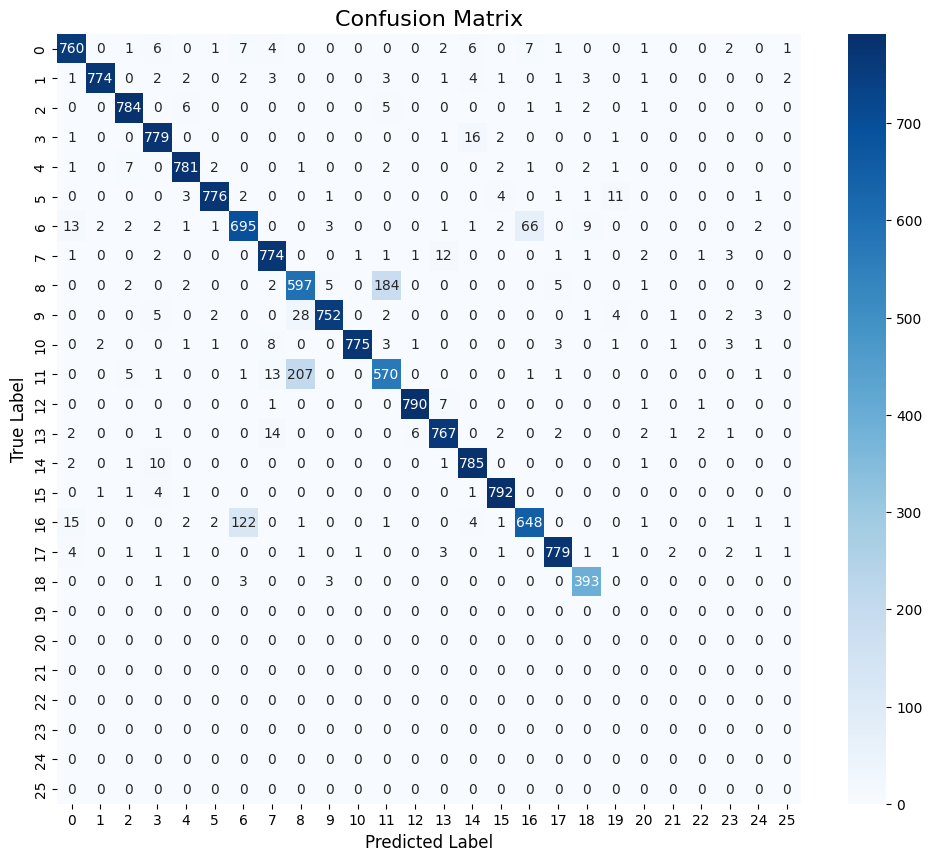

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
y_pred_proba = model_vgg.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 10})
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Show some misclassified examples

Number of misclassified: 1028


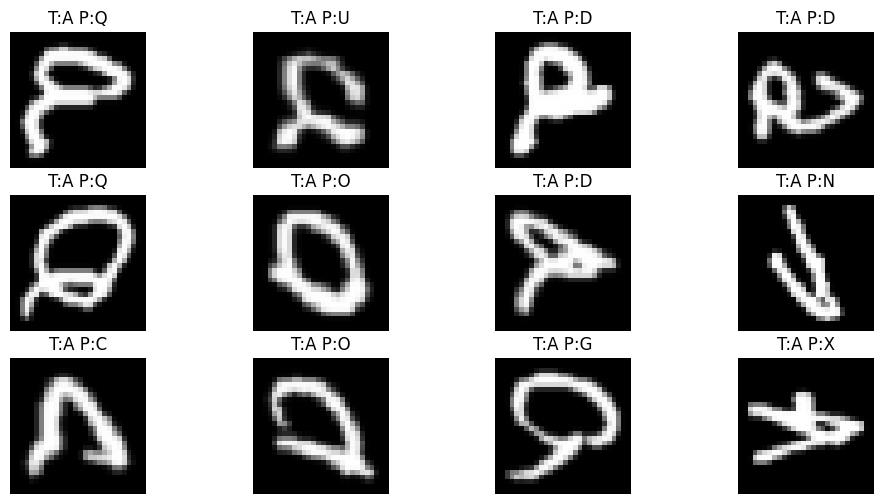

In [51]:
mis_idx = np.where(y_pred != y_true)[0]
print('Number of misclassified:', len(mis_idx))


n_show = min(12, len(mis_idx))
plt.figure(figsize=(12,6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(X_test[idx].reshape(28, 28).T, cmap='gray')
    # plt.imshow(X_test[idx].squeeze(), cmap='gray')
    plt.title(f'T:{chr(ord("A")+y_true[idx])} P:{chr(ord("A")+y_pred[idx])}')
    plt.axis('off')
plt.show()

# After optimizing some misclassified examples

Total misclassified: 1028


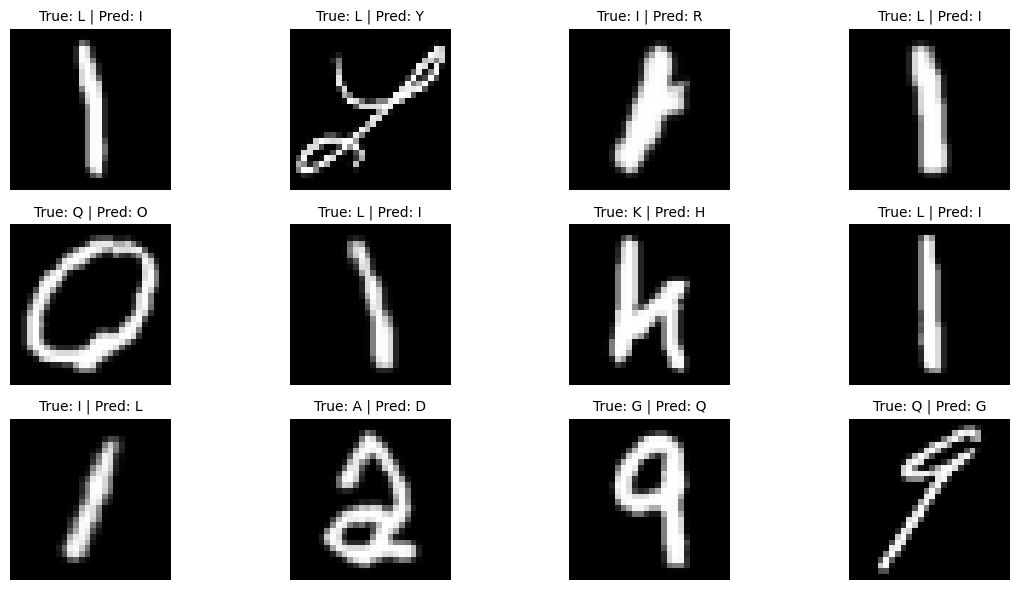

In [52]:
mis_idx = np.where(y_pred != y_true)[0]
np.random.shuffle(mis_idx)

print(f'Total misclassified: {len(mis_idx)}')
n_show = min(12, len(mis_idx))
plt.figure(figsize=(12, 6))
for i in range(n_show):
    idx = mis_idx[i]
    ax = plt.subplot(3, 4, i + 1)
    img = X_test[idx].reshape(28, 28)
    img = np.rot90(img.T, k=1)
    plt.imshow(img, cmap='gray')

    true_char = chr(ord("A") + y_true[idx])
    pred_char = chr(ord("A") + y_pred[idx])

    plt.title(f'True: {true_char} | Pred: {pred_char}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# This indicates that about 5% of EMNIST letters dataset looks like the messy examples above.

# VIT

In [56]:
# Vision Transformer (ViT) for EMNIST letters (28x28x1 → 26 classes)
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

def create_vit_classifier(
    input_shape=(28, 28, 1),
    num_classes=26,
    image_size=28,
    patch_size=4,           # 28 / 4 = 7 → 49 patches
    projection_dim=64,
    transformer_layers=4,
    num_heads=4,
    transformer_units=[128, 64],   # MLP inside transformer
    mlp_head_units=[256, 128],     # final classification head
    dropout_rate=0.1
):
    inputs = keras.Input(shape=input_shape)

    # 1) Patch embedding using a Conv2D with stride = patch_size
    # Output shape: (batch, 7, 7, projection_dim) for 28x28 with patch_size=4
    x = layers.Conv2D(
        filters=projection_dim,
        kernel_size=patch_size,
        strides=patch_size,
        padding="valid"
    )(inputs)  # (batch, H', W', projection_dim)

    # Flatten patches: (batch, num_patches, projection_dim)
    num_patches = (image_size // patch_size) ** 2  # 49
    x = layers.Reshape((num_patches, projection_dim))(x)

    # 2) Add learnable positional embeddings
    positions = tf.range(start=0, limit=num_patches, delta=1)
    pos_embedding_layer = layers.Embedding(
        input_dim=num_patches,
        output_dim=projection_dim
        )
    position_embeddings = pos_embedding_layer(positions)  # (num_patches, projection_dim)
    x = x + position_embeddings  # broadcast over batch

    # 3) Transformer encoder blocks
    for _ in range(transformer_layers):
        # Layer norm before attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)

        # Multi-head self-attention
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=projection_dim,
            dropout=dropout_rate
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, x])

        # Layer norm + MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        for units in transformer_units:
            x3 = layers.Dense(units, activation="gelu")(x3)
            x3 = layers.Dropout(dropout_rate)(x3)
     # Second skip connection
        x = layers.Add()([x2, x3])

    # 4) Classification head
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling over the patch tokens
    x = layers.GlobalAveragePooling1D()(x)

    # MLP head
    for units in mlp_head_units:
        x = layers.Dense(units, activation="gelu")(x)
        x = layers.Dropout(dropout_rate)(x)

    # Final classifier
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name="vit_emnist_letters")
    return model

# Instantiate the ViT model
model = create_vit_classifier(
    input_shape=(28, 28, 1),
    num_classes=26
)

# Compile it (you can tweak optimizer/lr later)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "vit_emnist_letters"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 64)  │      1,088 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 49, 64)    │          0 │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 49, 64)    │          0 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 49, 64)    │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 49, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 49, 128)   │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 49, 64)    │      8,256 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 49, 64)    │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 49, 64)    │          0 │ add_1[0][0],      │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 49, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 49, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 49, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 49, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 49, 128)   │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 49, 64)    │      8,256 │ dropout_5[0][0] 

 Total params: 386,906 (1.48 MB)

 Trainable params: 386,906 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
print("X_train min:", X_train.min(), " max:", X_train.max())
print("X_val min:", X_val.min(), " max:", X_val.max())

X_train min: 0.0  max: 1.0
X_val min: 0.0  max: 1.0


In [57]:
print(y_train.shape)
print(y_train[:10])


(79919, 26)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0.]]


In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Image Augmentation
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Callbacks
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-5
)

callbacks = [early_stop, reduce_lr]

# Steps per epoch
steps_per_epoch = len(X_train) // 64 // 2

#  Training
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=steps_per_epoch,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50
  3/624 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.8759 - loss: 0.3472

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/624 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8729 - loss: 0.3809 - val_accuracy: 0.8869 - val_loss: 0.3381 - learning_rate: 5.0000e-04
Epoch 2/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8680 - loss: 0.3837 - val_accuracy: 0.8731 - val_loss: 0.3753 - learning_rate: 5.0000e-04
Epoch 3/50
  1/624 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8906 - loss: 0.3978

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8906 - loss: 0.3978 - val_accuracy: 0.8733 - val_loss: 0.3778 - learning_rate: 5.0000e-04
Epoch 4/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8859 - loss: 0.3346 - val_accuracy: 0.8977 - val_loss: 0.3092 - learning_rate: 2.5000e-04
Epoch 5/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8934 - loss: 0.3145 - val_accuracy: 0.8935 - val_loss: 0.3196 - learning_rate: 2.5000e-04
Epoch 6/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8906 - loss: 0.3424 - val_accuracy: 0.8947 - val_loss: 0.3149 - learning_rate: 2.5000e-04
Epoch 7/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.8929 - loss: 0.3091 - val_accuracy: 0.9010 - val_loss: 0.2919 - learning_rate: 1.2500e-04
Epoch 8/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.9009 - loss: 0.2893 - val_accuracy: 0.9032 - val_loss: 0.2887 - learning_rate: 1.2500e-04
Epoch 9/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9

# VIT Evaluations

Test Loss: 0.2911
Test Accuracy: 0.9001
463/463 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


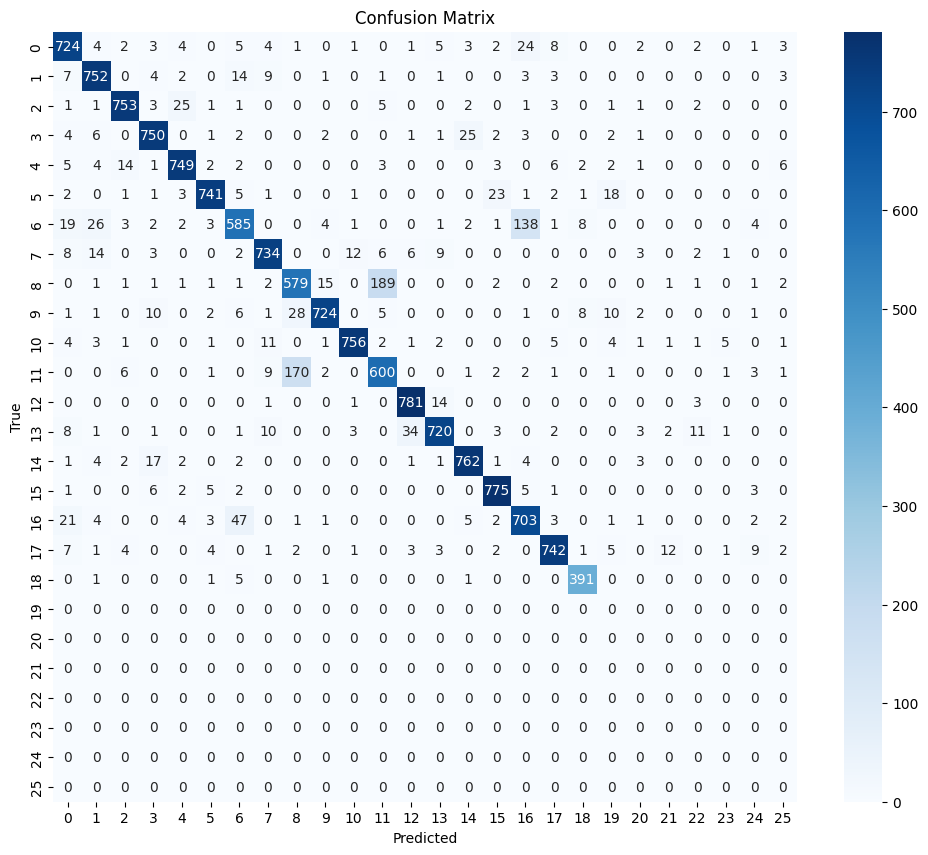

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1188:

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       799
           1       0.91      0.94      0.93       800
           2       0.96      0.94      0.95       800
           3       0.94      0.94      0.94       800
           4       0.94      0.94      0.94       800
           5       0.97      0.93      0.95       800
           6       0.86      0.73      0.79       800
           7       0.94      0.92      0.93       800
           8       0.74      0.72      0.73       800
           9       0.96      0.91      0.93       800
          10       0.97      0.94      0.96       800
          11       0.74      0.75      0.74       800
          12       0.94      0.98      0.96       800
          13       0.95      0.90      0.92       800
          14       0.95      0.95      0.95       800
          15       0.95      0.97      0.96       800
          16       0.79      0.88      0.83       800
   

/tmp/ipython-input-2349162270.py:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', 26)


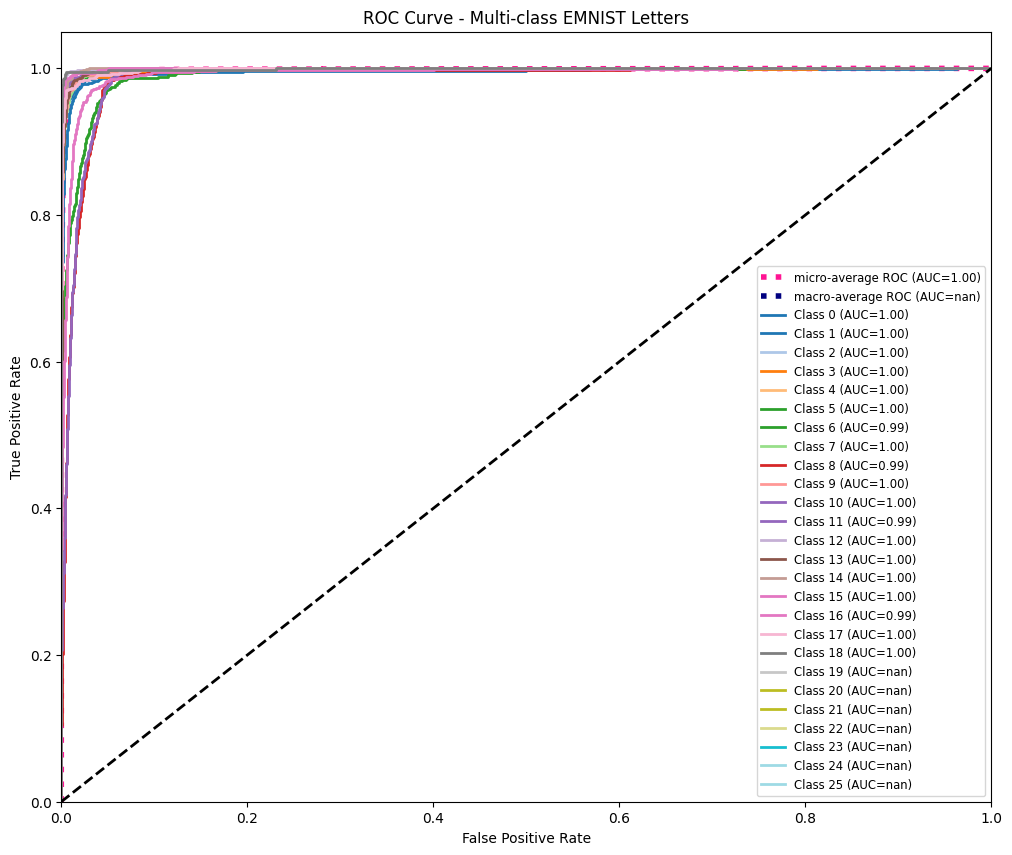

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

#  Evaluate on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

#  Predictions
y_pred_probs = model.predict(X_test)

# Convert y_test to labels if One-Hot
if y_test.ndim == 2:
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test

y_pred_labels = np.argmax(y_pred_probs, axis=1)


#  Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Classification Report
report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:\n", report)

#  ROC Curve (Multi-class)
# Ensure y_test is One-Hot
if y_test.ndim == 1:
    y_test_onehot = label_binarize(y_test, classes=np.arange(26))
else:
    y_test_onehot = y_test

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(26):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Macro-average
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(26)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(26):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 26
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC Curves
plt.figure(figsize=(12,10))
plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC (AUC={roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC (AUC={roc_auc["macro"]:.2f})', color='navy', linestyle=':', linewidth=4)

colors = plt.cm.get_cmap('tab20', 26)
for i in range(26):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2, label=f'Class {i} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class EMNIST Letters')
plt.legend(loc="lower right", fontsize='small')
plt.show()
